In [16]:
import pandas as pd

In [17]:
pd.options.mode.chained_assignment = None

champs = pd.read_csv("data/wsmtb/2022-XC-Round-3-Results.csv", skiprows=2)
riders = champs[champs.apply(lambda row: pd.notnull(row["Bib"]) and row["Bib"].isnumeric(), axis = 1)]

grades = riders["Bib"].astype(int).apply(lambda b: "A" if b < 100 else ("B" if b < 200 else ("C" if b < 300 else ("D" if b < 400 else ("E" if b < 500 else "F")))))
riders.insert(2,"Grade",grades)
riders

,Category Rank,Bib,Grade,Name,Laps Completed,Race Time,Lap1,Lap2,Lap3,Lap4,Lap5,Lap6
1,1,1,A,CAMERON WINFIELD,5,"00:57:56,9","0:11:19,6","0:11:59,8","0:12:04,2","0:11:05,4","0:11:28,0",NaN
2,2,18,A,BLAKE SUTCLIFFE,5,"00:58:30,7","0:11:20,2","0:11:59,9","0:12:03,9","0:11:26,8","0:11:40,1",NaN
3,3,4,A,LUKE BRAME,5,"00:58:52,6","0:11:19,2","0:11:59,8","0:12:04,4","0:12:00,2","0:11:29,2",NaN
4,4,23,A,DAVID WINFIELD,5,"01:00:03,2","0:11:50,2","0:11:56,9","0:11:59,8","0:11:59,5","0:12:17,0",NaN
5,5,44,A,SIMON EBBELING,5,"01:03:44,5","0:12:21,4","0:12:34,8","0:12:45,8","0:12:58,8","0:13:03,9",NaN
6,6,12,A,PETER WAKEFIELD,5,"01:04:20,7","0:12:42,0","0:12:39,7","0:13:02,4","0:13:12,2","0:12:44,7",NaN
7,7,16,A,STEPHEN TOMCZYK,5,"01:10:47,9","0:12:34,8","0:12:55,5","0:13:06,7","0:13:16,2","0:18:54,9",NaN
8,8,3,A,GILLES GENGOUX,5,"01:17:51,1","0:14:46,3","0:15:22,2","0:15:53,7","0:16:01,5","0:15:47,6",NaN
10,1,40,A,CAITLYN BRAZIER,4,"00:57:07,8","0:13:53,6","0:14:27,3","0:14:29,8","0:14:17,3",NaN,NaN
11,2,43,A,CATHERINE WOOD,4,"00:57:56,9","0:14:26,2","0:14:37,0","0:14:15,6","0:14:38,3",NaN,NaN


In [18]:
# kill the comma
 
riders  = riders.replace("(.*),(\d)", "\\1.\\2", regex=True)
riders

,Category Rank,Bib,Grade,Name,Laps Completed,Race Time,Lap1,Lap2,Lap3,Lap4,Lap5,Lap6
1,1,1,A,CAMERON WINFIELD,5,00:57:56.9,0:11:19.6,0:11:59.8,0:12:04.2,0:11:05.4,0:11:28.0,NaN
2,2,18,A,BLAKE SUTCLIFFE,5,00:58:30.7,0:11:20.2,0:11:59.9,0:12:03.9,0:11:26.8,0:11:40.1,NaN
3,3,4,A,LUKE BRAME,5,00:58:52.6,0:11:19.2,0:11:59.8,0:12:04.4,0:12:00.2,0:11:29.2,NaN
4,4,23,A,DAVID WINFIELD,5,01:00:03.2,0:11:50.2,0:11:56.9,0:11:59.8,0:11:59.5,0:12:17.0,NaN
5,5,44,A,SIMON EBBELING,5,01:03:44.5,0:12:21.4,0:12:34.8,0:12:45.8,0:12:58.8,0:13:03.9,NaN
6,6,12,A,PETER WAKEFIELD,5,01:04:20.7,0:12:42.0,0:12:39.7,0:13:02.4,0:13:12.2,0:12:44.7,NaN
7,7,16,A,STEPHEN TOMCZYK,5,01:10:47.9,0:12:34.8,0:12:55.5,0:13:06.7,0:13:16.2,0:18:54.9,NaN
8,8,3,A,GILLES GENGOUX,5,01:17:51.1,0:14:46.3,0:15:22.2,0:15:53.7,0:16:01.5,0:15:47.6,NaN
10,1,40,A,CAITLYN BRAZIER,4,00:57:07.8,0:13:53.6,0:14:27.3,0:14:29.8,0:14:17.3,NaN,NaN
11,2,43,A,CATHERINE WOOD,4,00:57:56.9,0:14:26.2,0:14:37.0,0:14:15.6,0:14:38.3,NaN,NaN


In [19]:
# cummulative
riders["Total1"] = pd.to_timedelta(riders["Lap1"])
for lap in [2,3,4,5]:
    riders[f"Total{lap}"] = riders[f"Total{lap-1}"] + pd.to_timedelta(riders[f"Lap{lap}"])
riders

,Category Rank,Bib,Grade,Name,Laps Completed,Race Time,Lap1,Lap2,Lap3,Lap4,Lap5,Lap6,Total1,Total2,Total3,Total4,Total5
1,1,1,A,CAMERON WINFIELD,5,00:57:56.9,0:11:19.6,0:11:59.8,0:12:04.2,0:11:05.4,0:11:28.0,NaN,0 days 00:11:19.600000,0 days 00:23:19.400000,0 days 00:35:23.600000,0 days 00:46:29,0 days 00:57:57
2,2,18,A,BLAKE SUTCLIFFE,5,00:58:30.7,0:11:20.2,0:11:59.9,0:12:03.9,0:11:26.8,0:11:40.1,NaN,0 days 00:11:20.200000,0 days 00:23:20.100000,0 days 00:35:24,0 days 00:46:50.800000,0 days 00:58:30.900000
3,3,4,A,LUKE BRAME,5,00:58:52.6,0:11:19.2,0:11:59.8,0:12:04.4,0:12:00.2,0:11:29.2,NaN,0 days 00:11:19.200000,0 days 00:23:19,0 days 00:35:23.400000,0 days 00:47:23.600000,0 days 00:58:52.800000
4,4,23,A,DAVID WINFIELD,5,01:00:03.2,0:11:50.2,0:11:56.9,0:11:59.8,0:11:59.5,0:12:17.0,NaN,0 days 00:11:50.200000,0 days 00:23:47.100000,0 days 00:35:46.900000,0 days 00:47:46.400000,0 days 01:00:03.400000
5,5,44,A,SIMON EBBELING,5,01:03:44.5,0:12:21.4,0:12:34.8,0:12:45.8,0:12:58.8,0:13:03.9,NaN,0 days 00:12:21.400000,0 days 00:24:56.200000,0 days 00:37:42,0 days 00:50:40.800000,0 days 01:03:44.700000
6,6,12,A,PETER WAKEFIELD,5,01:04:20.7,0:12:42.0,0:12:39.7,0:13:02.4,0:13:12.2,0:12:44.7,NaN,0 days 00:12:42,0 days 00:25:21.700000,0 days 00:38:24.100000,0 days 00:51:36.300000,0 days 01:04:21
7,7,16,A,STEPHEN TOMCZYK,5,01:10:47.9,0:12:34.8,0:12:55.5,0:13:06.7,0:13:16.2,0:18:54.9,NaN,0 days 00:12:34.800000,0 days 00:25:30.300000,0 days 00:38:37,0 days 00:51:53.200000,0 days 01:10:48.100000
8,8,3,A,GILLES GENGOUX,5,01:17:51.1,0:14:46.3,0:15:22.2,0:15:53.7,0:16:01.5,0:15:47.6,NaN,0 days 00:14:46.300000,0 days 00:30:08.500000,0 days 00:46:02.200000,0 days 01:02:03.700000,0 days 01:17:51.300000
10,1,40,A,CAITLYN BRAZIER,4,00:57:07.8,0:13:53.6,0:14:27.3,0:14:29.8,0:14:17.3,NaN,NaN,0 days 00:13:53.600000,0 days 00:28:20.900000,0 days 00:42:50.700000,0 days 00:57:08,NaT
11,2,43,A,CATHERINE WOOD,4,00:57:56.9,0:14:26.2,0:14:37.0,0:14:15.6,0:14:38.3,NaN,NaN,0 days 00:14:26.200000,0 days 00:29:03.200000,0 days 00:43:18.800000,0 days 00:57:57.100000,NaT


In [25]:
ab_grades = riders[((riders["Grade"] == "A"))& (riders["Lap5"])]
ab_grades


,Category Rank,Bib,Grade,Name,Laps Completed,Race Time,Lap1,Lap2,Lap3,Lap4,Lap5,Lap6,Total1,Total2,Total3,Total4,Total5
1,1,1,A,CAMERON WINFIELD,5,00:57:56.9,0:11:19.6,0:11:59.8,0:12:04.2,0:11:05.4,0:11:28.0,NaN,0 days 00:11:19.600000,0 days 00:23:19.400000,0 days 00:35:23.600000,0 days 00:46:29,0 days 00:57:57
2,2,18,A,BLAKE SUTCLIFFE,5,00:58:30.7,0:11:20.2,0:11:59.9,0:12:03.9,0:11:26.8,0:11:40.1,NaN,0 days 00:11:20.200000,0 days 00:23:20.100000,0 days 00:35:24,0 days 00:46:50.800000,0 days 00:58:30.900000
3,3,4,A,LUKE BRAME,5,00:58:52.6,0:11:19.2,0:11:59.8,0:12:04.4,0:12:00.2,0:11:29.2,NaN,0 days 00:11:19.200000,0 days 00:23:19,0 days 00:35:23.400000,0 days 00:47:23.600000,0 days 00:58:52.800000
4,4,23,A,DAVID WINFIELD,5,01:00:03.2,0:11:50.2,0:11:56.9,0:11:59.8,0:11:59.5,0:12:17.0,NaN,0 days 00:11:50.200000,0 days 00:23:47.100000,0 days 00:35:46.900000,0 days 00:47:46.400000,0 days 01:00:03.400000
5,5,44,A,SIMON EBBELING,5,01:03:44.5,0:12:21.4,0:12:34.8,0:12:45.8,0:12:58.8,0:13:03.9,NaN,0 days 00:12:21.400000,0 days 00:24:56.200000,0 days 00:37:42,0 days 00:50:40.800000,0 days 01:03:44.700000
6,6,12,A,PETER WAKEFIELD,5,01:04:20.7,0:12:42.0,0:12:39.7,0:13:02.4,0:13:12.2,0:12:44.7,NaN,0 days 00:12:42,0 days 00:25:21.700000,0 days 00:38:24.100000,0 days 00:51:36.300000,0 days 01:04:21
7,7,16,A,STEPHEN TOMCZYK,5,01:10:47.9,0:12:34.8,0:12:55.5,0:13:06.7,0:13:16.2,0:18:54.9,NaN,0 days 00:12:34.800000,0 days 00:25:30.300000,0 days 00:38:37,0 days 00:51:53.200000,0 days 01:10:48.100000
8,8,3,A,GILLES GENGOUX,5,01:17:51.1,0:14:46.3,0:15:22.2,0:15:53.7,0:16:01.5,0:15:47.6,NaN,0 days 00:14:46.300000,0 days 00:30:08.500000,0 days 00:46:02.200000,0 days 01:02:03.700000,0 days 01:17:51.300000


<AxesSubplot:>

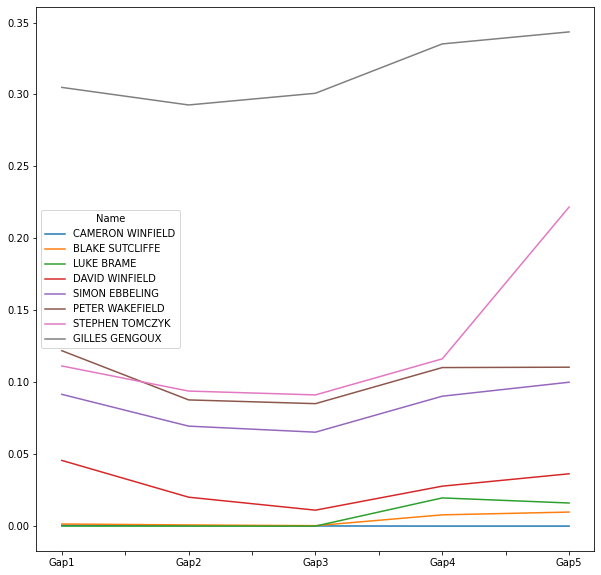

In [26]:

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

# add gap to leader
for lap in [1,2,3,4,5]:
    ab_grades[f"Gap{lap}"] = (ab_grades[f"Total{lap}"] - ab_grades[f"Total{lap}"].min())/ab_grades[f"Total{lap}"].min()
gaps = ab_grades[["Name","Gap1", "Gap2", "Gap3", "Gap4", "Gap5"]]
gaps = gaps.set_index("Name")
gaps.transpose().plot()